# The Convolutional Neural Network

## Learning objectives

1. Understand the principles behind the creation of the convolutional network
2. Gain an intuitive understanding of the convolution (feature map) and pooling (subsampling) operations
3. Develop a basic code implementation of the LeNet-5 and AlexNet networks in Python
4. Identify the similarities and differences between human vision and convolutional networks

## Historical and theoretical background

### Hubel and Wiesel

Rosenblatt's photo-perceptron (1958) was the first neural network model attempting to emulate human visual and perceptual capacities. Unfortunately, little was known at the time about the mammalian visual cortex that could inform Rosenblatt's work. Consequently, the photo-perceptron architecture was inspired by a very coarse idea of how the information flows from the retina to be processed by the brain. This changed fast in the years following the introduction of the perceptron. 

In 1962, [David H. Hubel](https://en.wikipedia.org/wiki/David_H._Hubel) and [Torsten Wiesel](https://en.wikipedia.org/wiki/Torsten_Wiesel) published one the major breakthroughs in the neurophysiology of the visual cortex: **the existence of orientation selectivity and columnar organization**. This is what they did: they placed tiny microelectrode in a single neuron in the primary visual cortex (V1) of an anesthetized cat and projected light and dark dots into the cat's eye. It did not work at all, they could not get a response from the neuron. But, they had a lucky accident. Since they were using a slide projector to show the dots, the *margin of the slide* with the dot also was projected into the cat's eyes and bam! the neuron fired. From there, they experimented with light and dark bars in different orientations, which led them to propose the existence of **two types of cells in the visual cortex**:

1. **simple cells**, that fire at a higher (or lower) rate depending on the bar orientation. Sometimes called "line detectors".
2. **complex cells** that fire in response to a wider variety of orientations, yet, they still show a preference (higher firing rate) to certain orientations. Sometimes are called "motion detectors". Importantly, these cells receive input from several *simple cells*. 

Importantly, these cells are **hierarchically organized**. Keeps this in mind as it'll become important later. Altogether, these discoveries were the basis of the work that granted them the Nobel Prize in Physiology in 1981. [Here](http://www.youtube.com/watch?v=jw6nBWo21Zk) is a short video from their experiments.

### Fukushima's Neocognitron

The work of Hubel and Wiesel served as the basis for the precursor of modern convolutional neural networks: **Fukushima's Neocognitron** (1980). [Kunihiko Fukushima](https://en.wikipedia.org/wiki/Kunihiko_Fukushima), a Japanese computer scientist, developed the Neocognitron idea while working at the [NHK Science & Technology Research Laboratories](https://en.wikipedia.org/wiki/NHK_Science_%26_Technology_Research_Laboratories). He did this by implementing the simple-cells and complex-cells discovered by Hubel and Wiesel in a multilayer neural network architecture. **Figure 1** shows a simplified diagram of the Neocognitron with 3 layers (4 if you count the inputs). 

<center> Figure 1: Simplified Neocognitrone </center>

<img src="./images/cov-net/neocognitron.svg">

The general idea behind the Neocognitron is the following: the **input layer $L_0$ works as the retina**, reading the raw input pattern. Then, each cell in a $S_1$ patch "reads" a sub-section of the input image based on a "preference" for a certain type of pattern. Any given layer $L_n$ will have several of these $S_j$ patches as a collection of **feature "filters"**. Some may detect a diagonal line, while other a small triangle, or a corner, or something else. Each $S_j$ patch connects to a $C_k$ cell, and such a cell fires if it gets any positive input from its corresponding patch. This process is also known as **"pooling"**. This cycle of "feature" detection and "pooling" is repeated as many times as intermediate layers in the network. The last layer corresponds to the output, where some neurons will fire depending on the input pattern. Mathematically, "feature detection" is accomplished by multiplying the input by a fixed matrix of weights, whereas "pooling" corresponding to taking an average of the connected patch of S-cells. 

You may have noticed that the behavior of the S-cells and C-cells replicate (to some extent) what Hubel and Wiesel found in their experiments. The great thing about this architecture is that it is **robust to shifts in the input image**: you can move the image around and the combination of "feature detection" and "pooling" will detect the presence of each part of the image regardless of its position. **Figure 2** exemplifies this characteristic.

<center> Figure 2 <\center>

<img src="./images/cov-net/neocognitron-cells.svg">

The Neocognitron is also **robust to deformation**: it will detect the object even if it's enlarged, reduced in size, or blurred, by virtue of the same mechanism that allows robustness to positional shifting. It is also important to notice that the pooling operation will "blur" the input image, and the fact that C-cells take the average of its corresponding S-cells makes the pooling more robust to random noise added to the image. [Here](http://www.youtube.com/watch?v=Qil4kmvm2Sw) you can find a short video (from the 80s!) explaining the basics of the Neocognitron. 

In sum, the Neocognitron established the following principles: 

- S-cells extract simple features
- C-cells combine and subsample S-cells extracted features
- Image features are learned and combined to produce more complex representations
- The image recognition process is hierarchically organized

If you are familiar with convolutional neural networks, you may be wondering what is the difference between the Neocognitron and later models like Yann LeCun's LeNet (1989), since they look remarkably similar. The main (but not only) difference is the training algorithm: **the Neocognitron does not use backpropagation**. At the time, backpropagation was not widely known as a training method for multilayer neural networks, reason why Fukushima never use it. Instead, he trained his model by using an unsupervised learning approach. Regardless, the Neocognitron laid the groundwork of modern neural network models of vision and computer vision more generally.

### LeCun's LeNet

The architecture today known as the convolutional neural network was introduced by [Yann LeCun](http://yann.lecun.com/) in 1989. Although LeCun was trained as an Electrical Engineer, he got interested in the idea of building intelligent machines from early on in his undergraduate education by reading a book about the [Piaget vs Chomsky debate on language acquisition](https://www.sciencedirect.com/science/article/abs/pii/0010027794900345). In that book, several researchers argued in favor of or against each author's view. Among those contributors was [Seymour Papert](https://en.wikipedia.org/wiki/Seymour_Papert) who mentioned Rosenblatt's perceptron in his article, which inspired LeCun to learn about neural networks for the first time. Ironically, this was the same Seymour Papert that published [the book](https://en.wikipedia.org/wiki/Perceptrons_(book)) (along with Marvin Minsky) that brought the demise on the interest on neural networks in the late '60s. I don't believe in karma, but this certainly looks like it. 

Eventually, LeCun became a postdoc at the University of Toronto with Geoffrey Hinton and started to prototype the first convolutional network. By the late '80s, LeCun was working at [Bell Labs](https://en.wikipedia.org/wiki/Bell_Labs) in New Jersey, the place where he and his colleagues developed at published the **first convolutional neural network trained with backpropagation**, the **"LeNet"**, that could effectively recognize handwritten zip codes from US post office. This early convolutional network went through several rounds of modifications and improvements (LeNet-1, LeNet-2, etc.) until in 1998 the [LeNet-5](http://yann.lecun.com/exdb/lenet/) reached test error rates of 0.95% (99.05 of classification accuracy) in the [MNIST dataset of handwritten digits](http://yann.lecun.com/exdb/mnist/). 

#### The convolution opertion: feature detection

I'll begin by schematically describing the LeNet-5 model and leave the mathematics for the next section. This conceptual explanation should be enough to have a higher-level understanding of the model but not necessarily to implement a convolutional network.

<center> Figure 3: LeNet-5 Architecture <\center>

<img src="./images/cov-net/LeNet.svg">

The general architecture of the LeNet-5 is shown in **Figure 3**. The input layer $L-0$ acts like the retina receiving images of characters that are centered and size-normalized (otherwise, some images may not fit in the input layer). The next layer $L-1$ is composed of several **features maps**, which have the same role that the Neocognitron simple-cells: to extract simple features as oriented edges, corners, end-points, etc. In practice, a feature map is a squared matrix of **identical weights**.  Weights *within* a feature map need to be identical so they can detect *the same* local feature in the input image. Weights *between* feature maps are different so they can detect *different* local features. Each unit in a feature map has a **receptive field**. This is, a small $n \times n$ sub-area or "neighborhood" of the input image that can be "perceived" by a unit in the feature map.  

Feature maps and receptive fields sound complicated. Here is a metaphor that may be helpful: imagine that you have 6 flashlights with a *square* beam of light. Each flashlight has the special quality of revealing certain "features" of images drawn with invisible ink, like corners or oriented edges. Also, imagine that you have a set of images that were drawn with invisible ink. Now, you need your special flashlights to reveal the hidden character in the image. What you need to do is to carefully illuminate each section of the invisible image, from *right to left and top to bottom*, with each of your 6 flashlights. Once you finish the process, you should be able to put together all the little "features" revealed by each flashlight to compose the full image shape. Here, the square beam of light sliding over each pixel represents the aforementioned *receptive field*, and each flashlight represents a *feature map*. 

**Figure 4** shows a simplified representation of the feature detection process (assuming that each time a pixel in the input image *match* a pixel in the feature detector we add a value of 1, although in practice it can be any real-valued scalar). In this example we use a **stride** of 1, meaning that we shift the receptive field by 1 pixel (to the right or down) for each cell in the feature map.

<center> Figure 4: Feature detection (convolution) <\center>

<img src="./images/cov-net/convolution.svg">

The process of sliding over the image with the receptive field (sometimes called *kernels*) of feature maps equals to a mathematical operation called **convolution** (technically, equals to *cross-correlation*, more about this later), hence the name **convolutional network**. The full convolution operation involves repeating the process in **Figure 4** for each feature map. If you are wondering how do you come up with appropriated features detectors, the answer is that you don't need to: the **feature maps weights are learned in the training process**. More on the mathematics of this later.

#### The pooling operation: subsampling

Once the convolution operation is done, what we have learned is whether a feature is present in the image or not. Now, knowing that a collection of features is present in an image won't tell us, by itself, which image they correspond to. What we need to know is their **approximate position relative to each other**. For instance, if we know that we have a "curvy horizontal line" at the center-bottom, a "curvy vertical line" at the middle-right, a "straight vertical line" at upper-left, and a "straight horizontal line" at the center-top, we should be able to tell we have a "5". This is even more important considering that real-life images like handwritten numbers have considerable variability in their shape. No two individuals write numbers in the exact same manner. Hence, we want our network to be as *insensitive as possible* to the absolute position of a feature, and as *sensitive as possible* to its relative position: handwritten 5s may look different, but the curvy part is almost always at the bottom and the straight part at the top. This is sometimes referred to as **invariance to local translation**. One way to accomplish this is by **reducing the spatial resolution of the image**. This is what **sub-sampling** or **pooling** does. 

There are many ways to sub-sample an image. In the LeNet-5, this operation performs a **local averaging** of a section of the feature map, effectively *reducing the resolution* of the feature map as a whole, and the sensitivity of the network to shifts and distortions in the input image. A colloquial example is what happens when you "pixelate" an image like in **Figure 5**.

<center> Figure 5: sub-sampling effect <\center>

<img src="./images/cov-net/pixelated.svg">

A sub-sampling layer will have as many "pixelated" feature maps as "normal" feature maps in the convolutional layer. The **mechanics of sub-sampling** are as follows: again, we have $n \times n$ receptive field that "perceives" a section of the "normal" feature map and connect to a unit in the "pixelated" feature map. This time, there is no overlap between each "stride" of the receptive field: each unit is connected to a *non-overlapping section* of the original feature map. You can think about this as taking "strides" of a size equal to $n$, e.g., for a $3 \times 3$ feature map, we take a stride of $3$. Then, we take a weighted average of each pixel in the receptive field and pass the resulting sum through a sigmoid function (or any other non-linear function). The *weights* in the weighted average are also parameters that the network learns with training. **Figure 6** shows this process for a *single* sub-sampled feature map.

<center> Figure 6: Sub-sampling (pooling)<\center>

<img src="./images/cov-net/pooling.svg">

The result of sub-sampling is another grid of numbers (note that the numbers in **Figure 6** are made up). We went from a $12 \times 12$ input image, to a $3 \times 3$ feature map after convolution and pooling (keep in mind that I intentionally reduced LeNet-5 original dimensions to simplify the examples). Since in our original example we had 6 features map, we need to repeat the process in **Figure 6** 6 times, one of each feature map.

The next convolution hidden layer $S_2$ increases the number of feature maps compared to $S_1$. If you were to add more sets of $S_n$ and $C_n$ hidden layers, you will repeat this alternating pattern again: *as the spatial resolution is reduced (by pooling), the number of feature maps in the next layer is increased*. The idea here is to **compensate for the reduction in spatial resolution by increasing the richness of the learned representations** (i.e., more feature maps).

Once we are done with the sequence of convolution and pooling, the network implements a traditional fully-connected layer as in the [multi-layer perceptron](https://com-cog-book.github.io/com-cog-book/features/multilayer-perceptron.html). The first fully-connected $F_1$ layer has the role of **"flattening"** the $C_2$ pooling layer. Remember that fully-connected layers take an input vector, and the dimensions of the LeNet-5 $C_2$ layer are a $5 \times 5 \times 16$ tensor, this is, sixteen 5 by 5 feature maps. The dimensionality of the first fully-connected layer is $120$, which is the result of another convolution. The next hidden layer $F_2$ "compress" the output even further into a vector of size $84$. Finally, we have the **output-layer** implementing a **euclidean radial basal function** (RBD) with 10 neurons to perform the classification of numbers (0-9).

### AlexNet

The LeNet-5 performance in the MNIST dataset was impressive but not out of the ordinary. Other methods like the Support Vector Machines could reach [similar or better performance at the time](http://yann.lecun.com/exdb/mnist/). Training neural networks were still costly and complicated compared to other machine learning techniques, hence the interest in neural nets faded in the late '90s again. However, several research groups continued to work in neural networks. The next big breakthrough in computer vision came in 2012  when Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton introduced the ["AlexNet"](https://en.wikipedia.org/wiki/AlexNet), a convolutional neural network that won the ["ImageNet Large Scale Visual Recognition Challenge"](https://en.wikipedia.org/wiki/ImageNet#ImageNet_Challenge) for a wide margin, surprising the entire computer vision community.

The main innovation introduced by AlexNet compared to the LeNet-5 was **its sheer size**. AlexNet main elements are the same: a sequence of convolutional and pooling layers followed by a couple of fully-connected layers. The LeNet-5 has two sets of convolutional and pooling layers, two fully-connected layers, and an RBD classifier as an output layer. AlexNet has five convolutional layers, three pooling layers, two fully-connected layers, and a softmax classifier output layer. The training time and dataset were larger as well. All of this was possible thanks to the availability of more computational processing power (particularly [Graphics Processing Units (GPUs)](https://en.wikipedia.org/wiki/Graphics_processing_unit)), and larger datasets (because of the internet). There a few additional innovations introduced with AlexNet:

- **Rectifier Linear Units (ReLU)**: instead of the hyperbolic tangent (tanh) and sigmoid units. ReLUs train several times faster than tanh or sigmoid units.
- **Normalization layers**: aimed to reduce overfitting. More on this latter.
- **Dropout layers**: dropout consists of setting to zero the output of a hidden neuron with some probability, in this case, 0.5. Also aimed to help with overfitting.
- **Data augmentation**: images were artificially translated, reflected, and distorted to increase the dataset size. The more variation in training examples, the more information available for the model to learn.

Diagramming AlexNet is complicated because the architecture is large and, at the time, they had to split the network into two GPUs, which is not necessary today. I'll use simplified notation to describe AlexNet and compare it with LeNet-5 as shown in **Figure 7**.

<center> Figure 7: AlexNet and LeNet architectures <\center> 

<img src="./images/cov-net/alexnet.svg">

Each layer in AlexNet is three dimensional because it was designed to classify 1000 *color images* (LeNet-5 classified 10 grey-scale digits). The dimensions represent *width x height x RGB* (red, green, and blue) color values. This type of 3-D arrays of numbers is often referred to as [mathematical tensors](https://en.wikipedia.org/wiki/Tensor). The pooling operation is done by taking the maximum value in the receptive field instead of the average of all units, which is known as **max pooling**. The pattern of connectivity between convolutional and pooling layers is different from the one in LeNet-5 too. Other than that, AlexNet utilizes the same building blocks and operations as LeNet-5.

## Neural network models of vision and computer vision drifting apart

If you ask a random researcher in computer vision about the correspondence between the human visual/perceptual system and convolutional nets, the most likely answer would be something like: "*Well, CNN's are roughly inspired in the brain but aren't actual models of the brain. I care about solving the problem artificial vision by any means necessary, regardless of the biological correspondence to human vision, more or less in the same manner we solved flying without having to imitate birds flapping*". Or some version of that. This talks to how **computer vision has become an independent area of research with its own goals**. Most researchers are fully aware that many of the design properties of modern convolutional nets are not biologically realistic. Beyond the parallels with human vision, strictly speaking, LeNet-5 and AlexNet are designed to maximize object-recognition performance, not biological-realism. And that's is perfectly fine. For instance, the LeNet 5 paper (1998) was published in the context of the debate between traditional pattern recognition with handcrafted features vs the automated learning-based approach of neural nets. Nothing was said about human perception. However, from our perspective, the issue of **whether convolutional nets are a useful model of human perception and vision** is critical. This is an open debate. Many researchers do believe that convolutional nets are useful models for human vision and perception, and there is a long list of [scientific articles trying to show this point](https://www.mitpressjournals.org/doi/abs/10.1162/jocn_a_01544). I won't review those arguments now. My point is to highlight the fact that what I'll describe next are "coarse" models attempting to approximate human abilities in narrow settings, not full-blown models of human vision.

## Mathematical formalization

I'll describe the mathematics for the LeNet-5, with a few references to some AlexNet operations. LeNet-5 architecture can be described by the following:

- convolution function (for hidden layers) 
- non-linear transformation function (for hidden layers)
- pooling function (for hidden layers)
- linear function (for fully-connected layers)
- euclidean radial basis (RBF) function (for the output)
- cost function (to compute overall error)
- learning procedure (i.e., backpropagation)

### Convolution function

The convolution operation *convolutes* pairs of functions. Here I'm using the plain meaning of "convoluted": to intertwine or twist things together. In the neural network context, the functions we convolute together are the **input function** $P$ and the **kernel function** $K$ (remember that *kernel* is another way to call the *receptive field* of a feature map). For the 2-dimensional inputs as in LeNet-5, the $P_{ij}$ function contains the 2-dimensional values for the input image, which in our case are grayscale values between 0 (white) and 255 (black). The $K_{mn}$ function contains the 2-dimensional values for the kernel, this is the matrix of weights $W_{mn}$ to be learned by the network. The **output** of the convolution is the feature map $F_{mn}$ in the next layer. In practice, the convolution operation is a **linear operation**, i.e., a weighted sum.

The convolution formula has different forms depending on the context. In the neural network context, we will compute a **discrete convolution**. The **convolution operator** is conventionally represented by the **$\bf{*}$ symbol**. Hence, we define the convolution between $P$ and $K$ as:

<img src="./images/cov-net/convolution-math.svg">

Where ${ij}$ are the width and length of the input image, and ${mn}$ are the width and length of the kernel.

Technically, LeNet-5 also adds a "bias" $b$ to each convolution, so the full expression becomes:

$$
F_{mn}= S(i,j) = b + (P*K)_{ij}  = b + \sum_m\sum_nP_{i-m, j-n} * K_{m,n}
$$

I'll ignore the $b$ term since it's not part of a convolution operation and it's not relevant for its explanation.

To apply a convolution the most important part is **to get the indices right**. We will work with a $3 \times 3$ input image example. There are multiple index conventions floating around the internet. I will use the following for convolution:

$$P=
\begin{bmatrix}
p_{-1,1} & p_{0,1} & p_{1,1} \\
p_{-1,0} & p_{0,0} & p_{1,0} \\
p_{-1,-1} & p_{0,-1} & p_{1,-1}
\end{bmatrix}
$$

For a $2 \times 2$ kernel that can't be centered at $0$, we will fix the bottom-left entry at $(0,0)$ as:

$$K=
\begin{bmatrix}
k_{0,1} & k_{1,1}\\
k_{0,0} & k_{1,0}
\end{bmatrix}
$$

I'll use a trick to make the convolution operation clearer. I'll replace the entries with actual numbers and overlay the matrices in a cartesian plane as in **Figure 8**:

<center> Figure 8 <\center>

<img src="./images/cov-net/cartesian-matrix.svg">

Now, remember that we want to compute a feature map $F$ with dimensions equal to $K$. Consequently, we need to compute 4 convolutions:

$$
F_{00} = S(i=0,j=0) \\
F_{01} = S(i=0,j=1) \\
F_{10} = S(i=1,j=0) \\
F_{11} = S(i=1,j=1)
$$ 

To obtain:

$$F=
\begin{bmatrix}
f_{0,1} & f_{1,1}\\
f_{0,0} & f_{1,0}
\end{bmatrix}
$$

Let's compute $F_{00} = S(i=0,j=0)$. Table 1 shows the entries to be multiplied and added together when we follow the double summtion $\sum_m\sum_nP_{i-m, j-n} * K_{m,n}$

<center> Table 1 <\center>

| i | j | m | n | i-m    | j-n    | P<sub>i-m,j-n</sub> | K<sub>m,n</sub> |
|---|---|---|---|--------|--------|---------------------|-----------------|
| 0 | 0 | 0 | 0 | 0-0=0  | 0-0=0  | P<sub>0,0</sub>     | K<sub>0,0</sub> |
| 0 | 0 | 0 | 1 | 0-0=0  | 0-1=-1 | P<sub>0,-1</sub>    | K<sub>0,1</sub> |
| 0 | 0 | 1 | 0 | 0-1=-1 | 0-0=0  | P<sub>-1,0</sub>    | K<sub>1,0</sub> |
| 0 | 0 | 1 | 1 | 0-1=-1 | 0-1=-1 | P<sub>-1,-1</sub>   | K<sub>1,1</sub> |

We will color-code each entry in the matrices and compute the value for $F_{00}$ as in **Figure 9**:

<center> Figure 9 <\center>

<img src="./images/cov-net/cartesian-matrix-1.svg">

We can fill in with the first $F_{00}$ entry (here is where you could add $b$ to the summation result):

$$F=
\begin{bmatrix}
f_{0,1} & f_{1,1}\\
142.5 & f_{1,0}
\end{bmatrix}
$$

If you observe the indices carefully, you'll notice the $P$ indices are the $K$ indices "flipped". Taking $-K$ (i.e., $-m,-n$) **reflects** the indices on the horizontal and vertical axes, whereas $j,i$ **offset** the indices on their corresponding axes. In the last example, there was no offset because both $j,i$ equal $0$. **Figure 10** shows the effects of reflecting by taking $-k$ and offsetting vertically and horizontally by different values of $j,i$:

<center> Figure 10 <\center>

<img src="./images/cov-net/cartesian-matrix-rotations.svg">

Let's see what happens when we compute the next feature map entry $F_{01}$:

| i | j | m | n | i-m    | j-n   | P<sub>i-m,j-n</sub> | K<sub>m,n</sub> |
|---|---|---|---|--------|-------|---------------------|-----------------|
| 0 | 1 | 0 | 0 | 0-0=0  | 1-0=1 | P<sub>0,1</sub>     | K<sub>0,0</sub> |
| 0 | 1 | 0 | 1 | 0-0=0  | 1-1=0 | P<sub>0,0</sub>     | K<sub>0,1</sub> |
| 0 | 1 | 1 | 0 | 0-1=-1 | 1-0=1 | P<sub>-1,1</sub>    | K<sub>1,0</sub> |
| 0 | 1 | 1 | 1 | 0-1=-1 | 1-1=0 | P<sub>-1,0</sub>    | K<sub>1,1</sub> |

Graphically, this looks like:

<center> Figure 11 <\center>

<img src="./images/cov-net/cartesian-matrix-2.svg">

We can fill in with the second entry on $F_{01}$:

$$F=
\begin{bmatrix}
195 & f_{1,1}\\
142.5 & f_{1,0}
\end{bmatrix}
$$

The pattern from here is always the same: flipp, offset, overlay, multiply, and add. If we follow the pattern for $F_{11}$ and $F_{10}$, $F$ results in:

$$F=
\begin{bmatrix}
195 & 241\\
142.5 & 222
\end{bmatrix}
$$

### Convolution in practice: cross-correlation

This may come as a surprise to you but in practice, several deep learning libraries like [MXNet](https://beta.mxnet.io/api/ndarray/_autogen/mxnet.ndarray.Convolution.html) and [Pytorch](https://pytorch.org/docs/stable/nn.html#convolution-layers) **DO NOT implement convolutions** but a closely related operation called **cross-correlation** (although the authors insist on calling it convolution). The cross-correlation operation is defined as:

$$
F_{mn}= S(i,j) = (P \star K)_{ij} =\sum_m\sum_nP_{i+m, j+n} \star K_{m,n}
$$

If you pay close attention to $K_{i+m, j+n}$ you'll see that the only difference is we are replacing the $-$ symbol with a $+$ symbol.

Now, If we keep the same convention of centering the input image at zero, we will get into trouble. For instance, **Table 2** shows the values for $i=0, j=1$:

<center> Table 2 <\center>

| i | j | m | n | i+m   | j+n   | P<sub>i+m,j+n</sub> | K<sub>m,n</sub> |
|---|---|---|---|-------|-------|---------------------|-----------------|
| 0 | 1 | 0 | 0 | 0+0=0 | 1+0=1 | P<sub>0,1</sub>     | K<sub>0,0</sub> |
| 0 | 1 | 0 | 1 | 0+0=0 | 1+1=2 | P<sub>0,2</sub>     | K<sub>0,1</sub> |
| 0 | 1 | 1 | 0 | 0+1=1 | 1+0=1 | P<sub>1,1</sub>     | K<sub>1,0</sub> |
| 0 | 1 | 1 | 1 | 0+1=1 | 1+1=0 | P<sub>2,0</sub>     | K<sub>1,1</sub> |

Now we get $P_{02} \star K_{01}$, which does not make sense since we don't have values at $P_{02}$. One way to address this is by **padding** the input image with zeros like: 

$$P=
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & p_{-1,1} & p_{0,1} & p_{1,1} & 0 \\
0 & p_{-1,0} & p_{0,0} & p_{1,0} & 0\\
0 & p_{-1,-1} & p_{0,-1} & p_{1,-1} & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

Now we have values at $P_{02}$. I personally find such solution mathematically sketchy. A better aproach is to change the indices of $P$ to be:

$$P=
\begin{bmatrix}
p_{0,2} & p_{1,2} & p_{2,2} \\
p_{0,1} & p_{1,1} & p_{2,1} \\
p_{0,0} & p_{1,0} & p_{2,0}
\end{bmatrix}
$$

Now we have values at $P_{02}$ and no padding is nedded. If you iterate over $\sum_m\sum_nP_{i+m, j+n} \star K_{m,n}$ the indices will work just fine to obtain $F$. 

Notice that in cross-correlation there aren't reflections just offsets. This is how the offsets look now:

<center> Figure 12 <\center>

<img src="./images/cov-net/cartesian-matrix-cross.svg">

I'll not compute the cross-correlation values. The computation is as simple as overlaying the kernel matrix $K$ on top of the $P$ input matrix and take a weighted sum. This is the reason why you'll see most textbooks in deep learning explain convolutions as "sliding" the kernel over the image taking a stride of X. Essentially, cross-correlation is a **measure of similarity** between the kernel and the input image: *the better the alignment, the higher the cross-correlation value*.

We addressed convolution and cross-correlation in 2 dimensions. Yet, keep in mind that you can use such techniques for problems in 1, 3, or N dimensions, and the mathematics extends naturally to such dimensions as well. 

### A note about convolution and cross-correlation

Before moving to the next section I want to address two questions: **Why to bother with convolutions (or cross-correlation) at all?**, and **Does it matter if I use convolution or cross-correlation?**

Regarding the first question, technically, we could "flatten" the image into a long vector *from the beginning*, and then use a traditional multi-layer perceptron to classify the images. Just imagine aligning each pixel $[p_{00}, p_{01}, ..., p_{ji}]$ one after the other in a long list, such that each pixel becomes a feature. This is way simpler than bothering with convolution or cross-correlation. The short answer is: because the **topological information matters**. Flattening the image lose such topological information. In other words, the relative position of each pixel in the grid matters, and we want to **exploit such space-dependence** when learning the network weights. If you train a model to recognize faces, the relative distance between *your eyes* and your *mouth* matters. Knowing that the images have a pair of eyes and a mouth is not enough. Therefore, we want to keep such a grid-structure when training the network.

Regarding the second question, the answer is: **no, it does not matter**. Well, it does matter in terms of the implementation, computational complexity, etc. But it does not matter in terms of finding a solution. The training algorithm will **ensure that the appropriate weights are learned** regardless. In short, when you use *convolution* the network will learn a matrix of weights $W$. If you use *cross-correlation* instead, the network will learn a set of weights $-W$, i.e., the weights "flipped".

### Pooling function

After convolution, we "pool" the feature map output. "Pooling" essentially means to compute a summary statistic of a selected region of pixels. There are several pooling modalities: max pooling, average pooling, $L^2$ norm pooling, and others. 

LeNet-5 implements **average pooling**, which is simply the average of the selected region in the feature map. For instance, if we take the feature map $F$:

$$F=
\begin{bmatrix}
195 & 241\\
142.5 & 222
\end{bmatrix}
$$

And apply average pooling, we get:

$$
M_{mn} = \frac{1}{m \times n} \sum_m\sum_nf_{mn} = \frac{1}{2*2} (142.5 + 222 + 195 + 241) = \frac{1}{4} (800.5) = 200.125
$$

AlexNet implements **max-pooling**, which is simply the largest value in the selected region of the feature map:

$$
M_{mn} = max(F) = 222
$$

There is a lot to say about pooling. For are thorough evaluation in the field of object recognition see [Scherer, Muller, and Behnke (2011)](http://ais.uni-bonn.de/papers/icann2010_maxpool.pdf).

### Non-linear transformation function

LeNet-5 implements two non-linear functions: a **sigmoid** after the convolution layer and a **scaled hyperbolic tangent** after the pooling layer. LeCun et all call the latter "squashing" function.

The **sigmoid** function is defined as:

$$
a = \sigma(f_{mn}) = \frac{1}{1+e^{-f_{mn}}}
$$

The sigmoid has an $S$ shape like in **Chart 1** (the red line indicates the inflection point or threshold):

In [1]:
from scipy.special import expit
import numpy as np
import altair as alt
import pandas as pd

In [2]:
z = np.arange(-5.0,5.0, 0.1)
a = expit(z)
df = pd.DataFrame({"a":a, "z":z})
df["z1"] = 0
df["a1"] = 0.5
sigmoid = alt.Chart(df).mark_line().encode(x="z", y="a")
threshold = alt.Chart(df).mark_rule(color="red").encode(x="z1", y="a1")
(sigmoid + threshold).properties(title='Chart 1')

alt.LayerChart(...)

The **scaled hyperbolic tangent function** is defined as:

$$
\tau(f_{mn}) = A \times \frac{(e^{f_{mn}} - e^{f_{mn}})}{(e^{f_{mn}} + e^{f_{mn}})}    
$$

With:
$$
A = 1.7159
$$

In practice, the scaling factor can be omitted with no relevant side effects, as it's done today. 

The shape of the scaled tanh function is similar to the sigmoid but the tanh can take negative values and the threshold point is at $0,0$:

In [3]:
z = np.arange(-5.0,5.0, 0.1)
t = np.tanh(z)
df = pd.DataFrame({"t":t, "z":z})
df["z1"] = 0
df["t1"] = -1
tanh = alt.Chart(df).mark_line().encode(x="z", y="t")
threshold = alt.Chart(df).mark_rule(color="red").encode(x="z1", y="t1")
(tanh + threshold).properties(title='Chart 2')

alt.LayerChart(...)

The main reason to use this "squashing" function is to speed up learning convergence. Basically, symmetric functions are believed to converge faster. For a more complete explanation see *Appendix A* in LeCun et all (1998).

Nowadays, a more popular non-linear function is the **ReLU** or rectified linear unit. This is what AlexNet uses. The ReLU simply returns the positive side of the input function or $0$:

$$
r (x) = max(x,0)
$$

The shape of the ReLU is a straight line in the negative side of the number line and linear function on the positive side:

In [4]:
z = np.arange(-5.0,5.0, 0.1)
r = np.maximum(z, 0)
df = pd.DataFrame({"r":r, "z":z})
df["z1"] = 0
df["r1"] = -1
tanh = alt.Chart(df).mark_line().encode(x="z", y="r")
threshold = alt.Chart(df).mark_rule(color="red").encode(x="z1", y="r1")
(tanh + threshold).properties(title='Chart 2')

alt.LayerChart(...)

### Linear function

After the second pooling layer, LeNet-5 "flattens" the 2-dimensional matrix into a vector. At this point flattening is not a problem because the features have been extracted in previous layers. Then computes a linear function $Z$, this is the dot product between the weights and the flattened vector and passes the result trough the sigmoid. We have seen this function before [here](https://com-cog-book.github.io/com-cog-book/features/adaline.html#Linear-aggregation-function) and [here](https://com-cog-book.github.io/com-cog-book/features/multilayer-perceptron.html#Linear-function). It is defined as:

$$
z(f_{mn}) = b + \sum x_n w_{mn}
$$

In matrix notation:

$$
\bf{z} = W^T \times \bf{x}
$$

### Output function

In previous chapters, we worked with either binary or real-valued outputs. Now we have a multi-class problem. LeNet-5 approaches this by implementing a **Euclidean radial basis (RBF) function**. Each output unit computes:

$$
\hat{y_i} = \sum_j (a_j - w_{ij})^2
$$

This equals to compute the Euclidean distance between the input vector $\bf{a}$ (output of the sigmoid) and the parameter vector $\bf{w}$. To understand why this works we need to delve into probability theory, which I'll skip for now since it requires introducing several new mathematical ideas. In brief, the larger the distance between the input vector $\bf{x}$ and the parameter vector $\bf{w}$, the larger the RBF value output, and the more likely the unit to activate.

In modern neural networks, like AlexNet, multi-class problems are usually approached with a **softmax function** defined as:

$$
\sigma(a)_i = \frac{e^{a_i}}{\sum_{j=1}^K e^{a_j}} \text {  for i} =1,...,K\text{  and}= (z_1,...,z_K)
$$

Let's unpack this: first, we apply the exponential function to each element of the vector $\bf{a}$, and then, we normalize by dividing by the sum of all exponentials values. The normalization constrains the sum of $\sigma(a)_i$ to 1. Now that we normalized to 1, each element of the output vector **can be interpreted as an activation probability**. This is convinient since now we can rank the outputs by its probability. For instance, in a 10-class problem, the unit with the highest value is the most likely value for a given input pattern.

### Cost function

In previous chapters, we used the Mean Squared Error (MSE) as a measure of "goodness" (or "badness") of the network predictions. This is not possible here since we are working on a multi-class problem and the RBD function. The LeNet-5 implements the **Maximum a Posteriori** [(MAP)](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) criterion as a cost function, defined as: 

$$
E(W) = \frac{1}{P}\sum_{p=1}^X(\hat{y}_{D^{p}}(X^p, W) + \log(e^{-j} + \sum_i e^{-\hat{y}(X^p, W)}))
$$

Explaining the cost function goes beyond what I want to cover here, and requires familiarity with Bayesian estimation. In brief, it maximizes the posterior probability of the correct class $D_p$ and selects the most likely class. If you are curious about the mechanics of MAP [here is a video](https://www.youtube.com/watch?v=kkhdIriddSI) with a detailed explanation.

We mentioned the softmax as an alternative output function. The cost function used to train a network with a softmax output typically is the **cross-entropy loss** defined as:

$$
E_i = -\sum_i y_ i log (p_i) 
$$

Where $y_i$ is the true label for $ith$ output unit, and $p_i$ is the softmax probability value for the $ith$ output unit. In short, cross-entropy computes the distance between the **model output distribution** and the **real output distribution**. A video with a extended explanation of the **cross-entropy loss** [here](https://www.youtube.com/watch?v=bLb_Kp5Q9cw).

### Learning procedure: backpropagation

As in the multi-layer perceptron, the gradients for the error with respect to the weights are computed with **backpropagation**. I gave an extended explanation for backpropagation for the multi-layer perceptron case [here](https://com-cog-book.github.io/com-cog-book/features/multilayer-perceptron.html#Backpropagation-algorithm). For now, let's just remember that the general form for backpropagation is:

$$
\frac{\partial E}{\partial{W^{L-n}}} = \frac{\partial E}{\partial{f^L}} \frac{\partial{f^L}}{\partial{f^{L-1}}} ... \frac{\partial{f^{L-n}}}{\partial{W^{L-n}}} 
$$

This is, sequentially applying the chain-rule of calculus layer by layer, until we reach $W$ in the layer $L-n$.

There is one important adjustment to mention regarding convolutional networks. Remember that each feature map (convolution) **shares weights**. To account for this, LeCun et all (1998) recommend to first compute each error derivative as if the network were a standard multi-layer perceptron without weight sharing, and then add the derivatives of all connections that share the same parameters. 

For the full derivation of backpropagation for convolutional networks see [Goodfellow (2010)](http://www.iro.umontreal.ca/~lisa/bib/pub_subject/language/pointeurs/convolution.pdf).

## A note about generalization in neural networks

Before implementing LeNet-5 and AlexNet I want to introduce an issue I have ignored so far: model **generalization**. If you are familiar with these issues feel free to skip to the next section. I've intentionally ignored these issues to fully focus on understanding the ideas behind the models.

Fundamentally, a neural network is an equation, a function. A very complicated one but it's just that: a bunch of functions wrapping each other with some number of adjustable parameters (the weights). The assumption of any machine learning model is that there is an equation "out there" describing the relationship between **features** and **outputs**, more or less in the same fashion that $e=mc^2$ describes the relationship between *energy* (i.e., *the output*) as a function of mass (i.e., *feature 1*) and the speed of light squared (i.e., *feature 2*). And, that such equation can be *learned* or *approximated* by using a combination of an architecture and a training algorithm. Once you learn/approximate the equation, you can feed feature values (like mass and speed of light) to the network and make very precise predictions about the output (energy), like in physics. 

Now, the issue with machine learning is that problems most people are interested to solve, like image recognition or language understanding, are so complex that no simple formula can be (or has been) found. Otherwise, we would not bother at all with machine learning. Therefore, we *flipped the problem*: we build systems that learn (approximate) the solution (function) for us by means of **extracting patterns from exemplars**. For instance, in face recognition, there is no known equation describing the relationship between the pixels in a face-image and subject identity. So we try to learn one. The problem with this strategy is that our models are **constrained to the information contained in the data**. Let's say you train a "children vs adults" classifier. In an ideal world, you would want to take a large random sample of the entire human species to train your model, so your model can extract "patterns" (i.e., statistical information) present in all human sub-groups. In practice, you can't do that. What you can do is to take freely available face-images from the internet. It is easy to see the problem with such a strategy: face-images on the internet are **highly biased**. For instance, the internet contains way more photos of white people from developed countries than from, let's say, Aboriginal Australians. The same goes for gender, age, and any other variation imaginable: the data is biased. If you train your model to perfection with that kind of dataset, your model may be very good at classifying pictures from the former group, but not from the latter. Another way to say this is that your model **does not generalize well to out-of-sample exemplars**.

Machine learning practitioners are fully aware of this problem. The traditional strategy to address it is to split the sample into two groups: **training** and **testing**. The training sample is used to train the model and learn the mathematical function relating features to targets. The testing sample is used *only* to test the model and obtain a measure of **generalization**. When the training and testing accuracy are really close, we say the model predictions generalize well. Otherwise, we say the model is **overfitting** the data. This is, the learned equation "fits" the data so well, that now is unable to make good predictions for out-of-sample exemplars. We also have the opposite phenomena: **underfitting**. A model is underfitted when it is so simple that has poor accuracy in the training set, and mediocre to poor in the testing set.

Overfitting is usually approached with a mix of techniques in neural networks: data augmentation, dropout, weight decay, early stopping, and others. Overfitting is often interpreted as a sign of excessive **model complexity**, so all these techniques try to simplify the model. Underfitting is usually approached with more training, more complex architectures, or more data. The goal is the opposite, to get increase model complexity so it can fit the data. In practice, the goal is to obtain a **balanced** model: neither overfitted nor underfitted, just "good-enough" fitted.   

**Figure 13** summarizes underfitting and overfitting in the two dimensional case. A extended treatment of issue for neural networks can be found [here](https://www.deeplearningbook.org/contents/regularization.html), [here](https://d2l.ai/chapter_multilayer-perceptrons/underfit-overfit.html), and [here](https://arxiv.org/pdf/1710.10686.pdf).

<center> Figure 13: overfitting, underfitting, and good-fitting <\center>

<img src="./images/cov-net/regularization.svg">

From **Figure 13** is clear than when we move from the training data to the testing data, the "good-fitting" curve generalizes better than the other two.

Is important to remark that even if you split your data into training-set and testing-set, and get excellent test-sample accuracy, that won't guarantee that your model would generalize well into the real world, for the same reasons I mentioned at the beginning: your model is constrained to the statistical information contained in your data. We can only hope that our sample data is a good enough representation of the real-world data. **No amount of regularization, cross-validation, etc. will fix poorly sampled data**.

## Code implementation

In previous chapters, I implemented the networks and backpropagation from scratch using Numpy and Python. I won't do that this time because it's going to take several hundreds of lines of code. It also requires relatively advanced knowledge of Python just to read the code, which is not assumed here.

Fortunately, modern deep learning libraries make relatively easy to build convolutional networks. I'll implement LeNet-5 and AlexNet using [Keras](https://keras.io/). For LeNet-5 we will use the MNIST dataset as in the original paper. Unfortunately, the ImageNet dataset is too large (1.2 million high-resolution images) to utilize in a free-to-use CPU cloud environment. It may take days to train, and I'm not even sure it would fit in memory. As a replacement, we will use the [CIFAR-10 small image dataset](https://www.cs.toronto.edu/~kriz/cifar.html) to test AlexNet.

### MNIST classification with LeNet-5

There are more tutorials about MNIST image classification with Keras on the internet that I can count. Yet very few implement LeNet-5, and most assume you know Keras already. I'll base LeNet-5 implementation on the generic CovNet [example provided by the official Keras documentation](https://keras.io/examples/mnist_cnn/). Implementing LeNet-5 in its original form requires a lot of custom code, particularly because the RBD activation function and the MAP cost function are hardly used anymore, hence they are not part of the standard set of functions in modern deep learning libraries. Therefore, I'll use the softmax activation and cross-entropy loss as replacements. The goal here is dual: to modify a standard CovNet implementation to match it *as closely as possible* to the original LeNet-5, and to provide explanations at each step of the implementation. 

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import altair as alt

import numpy as np
import pandas as pd

Using TensorFlow backend.


### Reading data from Keras

Keras comes with several popular datasets, like the MNIST database of handwritten digits and others that you can check [here](https://keras.io/datasets/). This dataset comprises 60,000 28x28 grayscale images for the training set and 10,000 for the testing set. MNIST is loaded as a (number-sample, 28, 28) multidimensional array.

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # unpack data into training and test

In [7]:
print(f'x_train shape:{x_train.shape}')
print(f'x_test shape:{x_test.shape}')

x_train shape:(60000, 28, 28)
x_test shape:(10000, 28, 28)


Let's visualize a few examples images from the dataset.

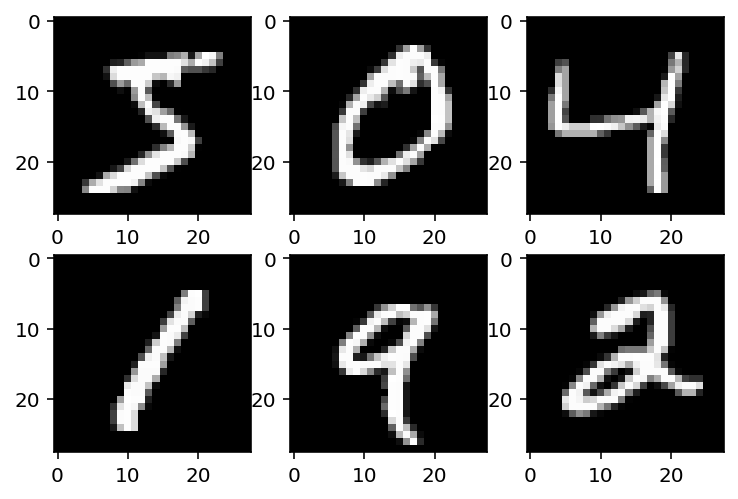

In [8]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

### Reshaping data

Convolutional layers in Keras expect inputs with shape (num-samples, width, height, RGB-channels). So far our data has (num-samples, width, height), so we need to add the last dimension. The next chunk of code verify that data-shape and reformat accordingly. 

In [9]:
img_rows, img_cols, channels = 28, 28, 1 # wight, height, colors

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape = (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)

In [10]:
print(f'x_train shape:{ x_train.shape}')
print(f'x_test shape:{ x_test.shape}')

x_train shape:(60000, 28, 28, 1)
x_test shape:(10000, 28, 28, 1)


### Normalizing data

Grayscale values range from 0 (white) to 255 (black). Neural networks tend to converge (learn) faster when data is normalized. Here, by dividing our data by 255 we get pixel values ranging from 0 (white) to 1 (black).

In [11]:
print(f'x_train range *before* normalization (max - min): {np.ptp(x_train)}')
print(f'x_test range *before* normalization (max - min): {np.ptp(x_test)}')

x_train range *before* normalization (max - min): 255
x_test range *before* normalization (max - min): 255


In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255

In [13]:
print(f'x_train range *after* normalization (max - min): {np.ptp(x_train)}')
print(f'x_test range *after* normalization (max - min): {np.ptp(x_test)}')

x_train range *after* normalization (max - min): 1.0
x_test range *after* normalization (max - min): 1.0


### One-hot encoding target vector

When we move from binary to multi-class classification, we need to change the shape of the target, in this case, from a single vector of shape (num-samples,) to a matrix of shape (num-samples, num-classes). In machine learning this coding scheme is called [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). In statistics is usually called [dummy coding](https://en.wikiversity.org/wiki/Dummy_variable_(statistics)). 

In [14]:
print(f'y_train shape *before* one-hot encoding: {y_train.shape}')
print(f'y_test shape *before* one-hot encoding: {y_test.shape}')

y_train shape *before* one-hot encoding: (60000,)
y_test shape *before* one-hot encoding: (10000,)


In [15]:
num_classes = 10 # Numbers 0-9 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
print(f'y_train shape *after* one-hot encoding: {y_train.shape}')
print(f'y_test shape *after* one-hot encoding: {y_test.shape}')

y_train shape *after* one-hot encoding: (60000, 10)
y_test shape *after* one-hot encoding: (10000, 10)


### LeNet-5 model architecture in Keras

Here is where we ensemble the LeNet-5 architecture as shown (as closely as possible) in **Figure 7**. The comments explain each step in the model definition.

In [17]:
# Define a network as a linear stack of layers
model = Sequential() 

# Add 1st convolutional layer with:
    # - features maps: 6
    # - kernel shape: 5 x 5 
    # - activation function post-convolution: hyperbolic tanget (tanh)
model.add(Conv2D(filters=6,kernel_size=(5,5),
                activation='tanh',
                input_shape=input_shape))

# Add 1st pooling layer with kernel shape: 2 x 2 
model.add(AveragePooling2D(pool_size=(2, 2)))

# Add 2st convolutional layer with:
    # - features maps: 16
    # - kernel shape: 5 x 5 
    # - activation function post-convolution: hyperbolic tanget (tanh)
model.add(Conv2D(filters=16,kernel_size=(5,5),
                activation='tanh'))

# Add 2st pooling layer with kernel shape: 2 x 2 
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps           
model.add(Flatten())

# Add 1st fully-connected layer with sigmoid activation function
model.add(Dense(120, activation='sigmoid'))

# Add 2st fully-connected layer with sigmoid activation function
model.add(Dense(84, activation='sigmoid'))

# Add output layer with softmax activation with 10 output classes         
model.add(Dense(num_classes, activation='softmax'))

The model summary shows that our architecture yields 62,006 trainable parameters.

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

## LeNet-5 Application: MNIST classification

Keras requires to compile the model before training. Here is where we add the cost function, the optimizer (learning algorithm, i.e., [Adadelta](https://arxiv.org/abs/1212.5701) , that is a variation of backpropagation), and the metrics to be saved.

In [19]:
# Compile model with:
    # - cost function: categorical cross-entropy
    # - optimizer: Adadelta (variation of backpropagation)
    # - metrics recorded: accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Now we are ready to train and evaluate LeNet-5 in the MNIST dataset.

In [20]:
epochs = 12 # number of passes of the entire dataset
batch_size = 128 # model iterations before a gradient upgrade

history =model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.7811 - accuracy: 0.7862 - val_loss: 0.2485 - val_accuracy: 0.9314
Epoch 2/12
60000/60000 [==============================] - 7s 109us/step - loss: 0.1895 - accuracy: 0.9456 - val_loss: 0.1292 - val_accuracy: 0.9623
Epoch 3/12
60000/60000 [==============================] - 8s 138us/step - loss: 0.1141 - accuracy: 0.9675 - val_loss: 0.0864 - val_accuracy: 0.9750
Epoch 4/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0843 - accuracy: 0.9749 - val_loss: 0.0699 - val_accuracy: 0.9788
Epoch 5/12
60000/60000 [==============================] - 9s 142us/step - loss: 0.0684 - accuracy: 0.9797 - val_loss: 0.0582 - val_accuracy: 0.9809
Epoch 6/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0526 - val_accuracy: 0.9829
Epoch 7/12
60000/60000 [==============================] - 9s 1

**Chart 4** shows the error (cost, loss) curve (red) and accuracy curve (accuracy) for each iteration.

In [21]:
loss = history.history['loss']
accuracy = history.history['accuracy']

df2 = pd.DataFrame({"accuracy":accuracy, "loss":loss, "time-step": np.arange(0, len(accuracy))})

base = alt.Chart(df2).mark_line(color="blue").encode(x="time-step", y="accuracy")
loss = alt.Chart(df2).mark_line(color="red").encode(x="time-step", y="loss")
(base  + loss).properties(title='Chart 4')

alt.LayerChart(...)

Our adapted version of LeNet-5 reached a training accuracy of ~99% in just 12 iterations. Let's test LeNet-5 generalization in the 10,000 samples of the test data. 

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss score: {score[0]}')
print(f'Test accuracy score:{ score[1]}')

Test loss score: 0.035752620117459444
Test accuracy score:0.9871000051498413


We obtained a test accuracy score of ~99%. Pretty good! Almost identical to the 99.05% of the original LeNet-5 in 1998.

### CIFAR-10 classification with AlexNet

Implement AlexNet is more straightforward than implementing LeNet-5 because the architecture elements are in line with modern neural networks. We will follow the same steps we followed with LeNet-5 to define and test AlexNet.

In [23]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import load_model

import matplotlib.pyplot as plt
import altair as alt

import numpy as np
import pandas as pd

### Reading data from Keras

The CIFAR-10 dataset comprises 50,000 32x32 color images for the training set and 10,000 for the testing set. CIFAR-10 is loaded as a (num-samples, 32, 32, 3) multidimensional array. 

In [24]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # unpack data into training and test

In [25]:
print(f'x_train shape:{x_train.shape}')
print(f'x_test shape:{x_test.shape}')

x_train shape:(50000, 32, 32, 3)
x_test shape:(10000, 32, 32, 3)


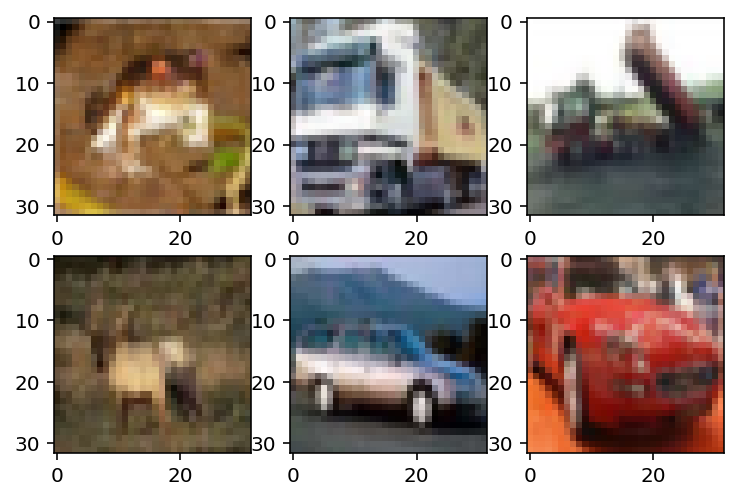

In [26]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i])

### Reshaping data

This time no reshaping is needed as the data comes in the right format (num-samples, width, height, RBG channels).

### Normalize data

Let's normalize the data to 0-1 range again.

In [27]:
print(f'x_train range *before* normalization (max - min): {np.ptp(x_train)}')
print(f'x_test range *before* normalization (max - min): {np.ptp(x_test)}')

x_train range *before* normalization (max - min): 255
x_test range *before* normalization (max - min): 255


In [28]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [29]:
print(f'x_train range *after* normalization (max - min): {np.ptp(x_train)}')
print(f'x_test range *after* normalization (max - min): {np.ptp(x_test)}')

x_train range *after* normalization (max - min): 1.0
x_test range *after* normalization (max - min): 1.0


### One-hot encoding target vector

We need to reshape the target vector in the same manner we did with MNIST.

In [30]:
print(f'y_train shape *before* one-hot encoding: {y_train.shape}')
print(f'y_test shape *before* one-hot encoding: {y_test.shape}')

y_train shape *before* one-hot encoding: (50000, 1)
y_test shape *before* one-hot encoding: (10000, 1)


In [31]:
num_classes = 10 # 10 object classes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [32]:
print(f'y_train shape *after* one-hot encoding: {y_train.shape}')
print(f'y_test shape *after* one-hot encoding: {y_test.shape}')

y_train shape *after* one-hot encoding: (50000, 10)
y_test shape *after* one-hot encoding: (10000, 10)


### AlexNet model architecture in Keras

Here is where we ensemble AlexNet architecture as shown (as closely as possible) in **Figure 7**. The comments explain each step in the model definition.

Since we are usin CIFAR-10 32x32 images instead of the 224x224 ImageNet images, "padding" will be necessary in several layers so dimensions match. Normally we will use kernels with different dimensions for CIFAR-10 but I'm opting for padding to recreate AlexNet as closely as possible.

In [33]:
img_rows, img_cols, channels = 32, 32, 3 # wight, height, colors
input_shape = (img_rows, img_cols, channels)

In [34]:
# Define a network as a linear stack of layers
model = Sequential() 

# Add 1st convolutional layer with:
    # - features maps (filters): 96
    # - kernel shape: 11 x 11 
    # - activation function post-convolution: rectifier linear unit (relu)
    # - stride size: 4 x 4
model.add(Conv2D(filters=96,
                 kernel_size=(11,11),
                 activation='relu',
                 strides=(4,4),
                 input_shape=input_shape))

# Batch normalisation in between layers
model.add(BatchNormalization())

# Add 1st pooling layer with 
    # - kernel shape: 3 x 3
    # - stride size: 2 x 2
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))

# Add 2nd convolutional layer with:
    # - features maps: 256
    # - kernel shape: 5 x 5 
    # - activation function post-convolution: rectifier linear unit (relu)
    # - stride size: 1 x 1
model.add(Conv2D(filters=256,
                 kernel_size=(5,5),
                 activation='relu',
                 strides=(1,1),
                 padding='same'))

# Batch normalisation in between layers
model.add(BatchNormalization())

# Add 1st pooling layer with 
    # - kernel shape: 3 x 3
    # - stride size: 2 x 2
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))

# Add 3rd convolutional layer with:
    # - features maps: 384
    # - kernel shape: 3 x 3 
    # - activation function post-convolution: rectifier linear unit (relu)
    # - stride size: 1 x 1
model.add(Conv2D(filters=384,
                 kernel_size=(3,3),
                 activation='relu',
                 strides=(1,1),
                 padding='same'))

# Add 4th convolutional layer with:
    # - features maps: 384
    # - kernel shape: 3 x 3 
    # - activation function post-convolution: rectifier linear unit (relu)
    # - stride size: 1 x 1
model.add(Conv2D(filters=384,
                 kernel_size=(3,3),
                 activation='relu',
                 strides=(1,1),
                 padding='same'))

# Add 5th convolutional layer with:
    # - features maps: 384
    # - kernel shape: 3 x 3 
    # - activation function post-convolution: rectifier linear unit (relu)
    # - stride size: 1 x 1
model.add(Conv2D(filters=384,
                 kernel_size=(3,3),
                 activation='relu',
                 strides=(1,1),
                 padding='same'))

# Add 3th pooling layer with 
    # - kernel shape: 3 x 3
    # - stride size: 2 x 2
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))

# Flatten feature maps           
model.add(Flatten())

# Add 1st fully-connected layer with relu activation function
model.add(Dense(4096, activation='relu'))

# Add dropout to help with generalization
model.add(Dropout(0.5))

# Add 2st fully-connected layer with relu activation function
model.add(Dense(4096, activation='relu'))

# Add dropout to help with generalization
model.add(Dropout(0.5))

# Add output layer with softmax activation with 10 output classes         
model.add(Dense(num_classes, activation='softmax'))

The model summary below shows that out network design yields ~22.5 million trainable parameters, which is massive compared to LeNet-5.

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 6, 96)          34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 96)          384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)         614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 2, 256)         1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 384)        

## AlexNet Application: CIFAR-5 classification

Which such a large number of parameters training our model to a meaningful accuracy level in a typical CPU may take from hours to days. For instance, my [Intel i7-8550U](https://ark.intel.com/content/www/us/en/ark/products/122589/intel-core-i7-8550u-processor-8m-cache-up-to-4-00-ghz.html) takes around 14 minutes to run 1 epoch. Running 50 epochs would take around 12 hours. There are several alternatives to train large models:

1. **Locally**: if you have a computer with one or multiple [state-of-the-art GPUs](https://lambdalabs.com/blog/choosing-a-gpu-for-deep-learning/), you could use that and the training of our model should be pretty fast. 

2. **High throughput computing (HTC)**: if you have access to a grid of computers (and know how to use it), you could take our code, repackage it, and use that. Most major universities have HTC or HPC clusters available for students. HTC computing is ideal for training neural networks since trained can be parallelized in multiple cores, significantly speeding up training time. 

3. **Remotely (cloud)**: you can use either someone else server via an SSH connection or cloud services as [AWS](https://aws.amazon.com/), [Google Cloud](https://cloud.google.com/), and [Microsoft Azure](https://azure.microsoft.com/en-us/).

4. **Google Colab**: [Google Colab](https://colab.research.google.com/) is a remote interactive computing environment (basically a Jupyter Notebook in a google computer) typically used to train machine learning models. It grants you free access to 1 GPU with a time limit (12 or 24 hours).

5. **Transfer learning**: recall that training a network essentially is to learn weight values. If someone else trained AlexNet in CIFAR-10, such a person can save the weights learned by the network, and we could re-use them for our porpuses. For popular models and datasets, most deep learning libraries provide pre-trained models. 

For a demo like ours, Google Colab is the best option. I copy-pasted AlexNet into a Colab notebook that you can [access here](https://colab.research.google.com/drive/1CJhNrMVEKLOTlq-eYwAENZjlJbGdGe4o#forceEdit=true&sandboxMode=true). I also saved the model such that we can reuse the trained parameters to make predictions in our test set. If you wanna go through the process of training AlexNet yourself, you can use the Colab Notebook and run the cells (in "Playground mode"). When I trained AlexNet with CIFAR-10 each epoch took a bit more than 1 minute to run, so training the model for 50 epochs should take about 1 hour. 

Uncomment and run the cells below only if you have access to adequate hardware (otherwise it will run for hours).

In [36]:
# Compile model with:
    # - cost function: categorical cross-entropy
    # - optimizer: Adadelta (variation of backpropagation)
    # - metrics recorded: accuracy
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

In [37]:
# epochs = 50 # number of passes of the entire dataset
# batch_size = 32 # model iterations before a gradient upgrade

#
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
#

In [38]:
# score = model.evaluate(x_test, y_test, verbose=0)
# print(f'Test loss score: {score[0]}')
# print(f'Test accuracy score:{ score[1]}')

From my 50 epochs Google Colab run with  I obtained a training accuracy score of ~77%. **Chart 4** shows the loss (red) and accuracy (blue) trajectory over iterations.

<img src="./images/cov-net/alexnet-training.svg">

Let's load the trained model to use on the test set. We first need to **download the model** I put on Google Drive by running the cell below. This may take a couple of minutes depending on your internet speed.

In [39]:
!gdown --id 1mMiujUTQQkQgU0CjAwVQN69GUSmHjxNo --output alexnet-cifar10.h5

Downloading...
From: https://drive.google.com/uc?id=1mMiujUTQQkQgU0CjAwVQN69GUSmHjxNo
To: /home/pablo/Desktop/projects/nn-mod-cog/notebooks/alexnet-cifar10.h5
271MB [06:14, 723kB/s]  


The model will be saved locally as "alexnet-cifar10.h5". Keras can easily import h5 files with the load_model method.

In [40]:
# returns previously trained AlexNet with CIFAR-10
alexnet = load_model('alexnet-cifar10.h5')

Now we can compute the test score accuracy as we did before.

In [41]:
score = alexnet.evaluate(x_test, y_test, verbose=0)
print(f'Test loss score: {score[0]}')
print(f'Test accuracy score:{ score[1]}')

Test loss score: 2.4020407371520998
Test accuracy score:0.5548999905586243


We obtain **~55% of test accuracy** which is significantly below the training accuracy. This is an example of **overfitting** or **overtraining**. There are multiple ways to address overfitting which I won't cover here (more normalization, dropout, early stopping, etc). It may be also the case we need a **different architecture** or simply **more training time**. More training is a counterintuitive suggestion: "How is that more training would help if "too much training" was causing the problem in the first place?" Turns out that sometimes neural networks shown a phenomenon known as ["double descent"](https://openai.com/blog/deep-double-descent/): performance improves, then get worse, and then *improves again*. if you want to learn more about double descent see [here](https://openai.com/blog/deep-double-descent/). 

Is recommended to delete the h5 file once you are done by running:

In [42]:
!rm alexnet-cifar10.h5

## Limitations

### CovNets learn "fragile"(?) representations

There is a funny phenomenon that brings elation to neural network critics: convolutional networks can be easily "fooled" by minuscule alterations to input images. Change a couple of pixels here and there to the picture of a "panda", and the network will predict "gibbon" with embarrassingly high confidence. From a cognitive science perspective, this is admittedly concerning, since such alterations are barely noticeable for humans, as illustrated by Goodfellow, Shlens, and Szegedy (2015) in **Figure 14**.

<center> Figure 14 <\center>

<img src="./images/cov-net/panda.png">

An important detail is that the perturbations (the image in the middle), although look random, are not random at all: **they are carefully "designed" to "fool" the network**. This carefully designed alterations are known as **adversarial attacks** or **adversarial examples**. By "designed" I don't mean handcrafted by humans but by another type of network known as Generative Adversarial Network (GAN). GANs are trained to generate images just "different enough" to fool your classifier network.

Many explanations have been proposed to explain why adversarial examples exist, for instance: 

- HA! Neural networks are rubbish 
- Neural networks pay attention to [meaningless fetures like texture](https://openreview.net/forum?id=Bygh9j09KX)
- Networks are [too linear](https://arxiv.org/pdf/1412.6572.pdf) 
- They are a consequence of the [high-dimensional of the input-space](https://arxiv.org/abs/1801.02774)
- They are a consequence of the [finite-sample phenomena](https://arxiv.org/abs/1608.07690)
- Actually, adversarial examples [are not bugs, but features](https://arxiv.org/abs/1905.02175)

The first five explanations are a problem for the idea that convolutional networks are a good conceptual model of human perception. They all indicate that something important is missing in our models that deviate from human perceptual processes, challenging their utility. Some point out to this kind of problem to suggest that there is something [so fundamentally different between human and neural nets perception](https://arxiv.org/abs/1801.00631) that we should either abandon or significantly changed neural nets to be useful models.

The last explanation challenges the first five. It is proposing that there is nothing wrong with neural networks. In brief, the idea is that what human perceives as "meaningless noise", in fact, is a relatively robust pattern which is useful to learn to make predictions. In other words, networks "see" things humans are missing, which are *features* as useful as "tails" and "legs" for prediction *in the training dataset*. True, this does not fully address the differences between machine and human perception, but it does contradict the idea neural networks are paying attention to useless features: they do pay attention to useful features, as humans do.

### Convolutional networks contain many "unrealistic" elements

Convolutional networks incorporate some **design elements that have no basis in human vision or perception**. Of course, this is only a problem if you are trying to emulate human vision and perception as closely as possible. Among them:

- The human eye is mostly a [low-resolution sensor](https://en.wikipedia.org/wiki/Visual_acuity) whereas most convolutional nets are trained with large high-resolution images.
- Human vision works by "sampling" or attending to [a relatively small section of a scene at the time](https://en.wikipedia.org/wiki/Saccade). Convolutional nets process the whole image at once.
- Human vision does not work in isolation, it is [integrated with other senses](https://en.wikipedia.org/wiki/Multisensory_integration), including feedback from higher-order cognitive functions. Most convolutional nets do one thing at the time in isolation: image recognition, image segmentation, etc.
- It is not clear that the brain implements convolution and pooling (or backpropagation for that matter, although [recent research have proposed](https://www.cell.com/trends/cognitive-sciences/fulltext/S1364-6613(19)30012-9) how backpropagation may work in the brain).

All the previously mentioned issues are actives areas of research.

### Massive data and computational requirements

As I mentioned [in previous chapters](https://com-cog-book.github.io/com-cog-book/features/multilayer-perceptron.html#Multilayer-perceptron-limitations), neural networks, in general, require enormous amounts of data to train effectively, which becomes even more obvious in the case of convolutional networks and images. I won't extend myself about this, just remember that processing capacity, past learning experience, and the richness of training data may partially explain the difference between human and neural networks' speed of learning. 

Regarding computational requirements, several techniques are available to reduce computing time which is mostly derived from training kernel weights with backpropagation: random kernel initialization, design kernels by hand, and learn the kernels with unsupervised learning techniques. See [Section 9.9](https://www.deeplearningbook.org/contents/convnets.html) from Goodfello, Bengio, & Courville (2016) for a review of such strategies.

## Conclusions

Limitations aside, convolutional networks are among the best examples of connecting cognitive neuroscience with artificial neural networks. Convolutional nets **core design principle** comes from classic neuroscience research: hierarchically organized layers of simple cells and complex cells acting together to build complex representations of objects. Perhaps the most interesting aspect of convolutional nets regarding human cognition, is they are by far the most successful model in terms of emulating human **performance** (emphasis in performance, not processes) in perceptual task. Further, the interplay between human vision and perception and neural nets is an active area of research that is trying to address the many limitations of this approach. 

## References

Fukushima, K. (1980). Neocognitron: A self-organizing neural network model for a mechanism of pattern recognition unaffected by shift in position. Biological Cybernetics, 36(4), 193–202.

Goodfellow, I. J. (2010). Technical report: Multidimensional, downsampled convolution for autoencoders. Technical report, Université de Montréal. 357.

Goodfellow, I., Bengio, Y., & Courville, A. (2016). 7. Regularization for Deep Learning. In Deep Learning. MIT Press. https://www.deeplearningbook.org/contents/regularization.html

Goodfellow, I., Bengio, Y., & Courville, A. (2016). 9. Convolutional Networks. In Deep Learning. MIT Press. https://www.deeplearningbook.org/contents/convnets.html

Goodfellow, I. J., Shlens, J., & Szegedy, C. (2014). Explaining and harnessing adversarial examples. ArXiv Preprint ArXiv:1412.6572.

Hubel, D. H., & Wiesel, T. N. (1962). Receptive fields, binocular interaction and functional architecture in the cat’s visual cortex. The Journal of Physiology, 160(1), 106–154.

Ilyas, A., Santurkar, S., Tsipras, D., Engstrom, L., Tran, B., & Madry, A. (2019). Adversarial examples are not bugs, they are features. Advances in Neural Information Processing Systems, 125–136.

Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. 1097–1105.

LeCun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E., Hubbard, W., & Jackel, L. D. (1989). Backpropagation applied to handwritten zip code recognition. Neural Computation, 1(4), 541–551.

LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278–2324.

Lindsay, G. (2020). Convolutional Neural Networks as a Model of the Visual System: Past, Present, and Future. Journal of Cognitive Neuroscience, 1–15.

Rosenblatt, F. (1958). The perceptron: A probabilistic model for information storage and organization in the brain. Psychological Review, 65(6), 386–408. https://doi.org/10.1037/h0042519

Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2020). 6. Convolutional Neural Networks. In Dive into Deep Learning. https://d2l.ai/chapter_convolutional-neural-networks/index.html

## Useful on-line resources

The internet is plenty of free great resources about convolutional networks. I  used Yann LeCun's interviews for the historical section.

Yann LeCun: Deep Learning, Convolutional Neural Networks, and Self-Supervised Learning | AI Podcast. [YouTube Video](https://www.youtube.com/watch?v=SGSOCuByo24&t=16s).

deeplearning.ai's Heroes of Deep Learning: Yann LeCun. [YouTube Video](https://www.youtube.com/watch?v=JS12eb1cTLE)

Yann LeCun's Lecture: Convolutional neural networks. [YouTube Video](https://www.youtube.com/watch?v=FW5gFiJb-ig&t=2s)

Practicum by Alfredo Canziani & Mark Goldstein: Natural signals properties and CNNs. [YouTube Video](https://www.youtube.com/watch?v=kwPWpVverkw)

Practicum by Alfredo Canziani & Mark Goldstein: Listening to convolutions. [YouTube Video](https://www.youtube.com/watch?v=OrBEon3VlQg)

MIT 6.S191 (2019): Convolutional Neural Networks. [YouTube Video](https://www.youtube.com/watch?v=H-HVZJ7kGI0)